In [1]:
# %cd ..
import numpy as np, matplotlib.pyplot as plt
import inputs, simuls, analysis
from analysis import iso_in_plots
results = analysis.GetResults(verbose=True)

# Results analysis

In [ ]:
histo_bins = 401
histo_step = .001/10 #mm
isotopes = ["C11", "N13", "O15", "F18", "Cu64"] 
pfolders = {
    "PHITS 3.3":"PHITS_xyz",
    # "PenEasy 2020":"PenEasy2020_xyz",
    # "PenEasy 2024":"PenEasy2024_xyz",
    # "PeneloPET 2024":"PeneloPET2024_xyz",
    # "GATE 9.2":"GATE92_xyz",
    # "GATE 9.3":"GATE93_xyz",
    # "GATE 7.0":"GATE7_xyz",
}

labels_iso = {iso:[] for iso in isotopes}
labels_prg = {p:[] for p in pfolders.keys()}

results.active_results.clear()
for iso in isotopes:
    for pname, pfolder in pfolders.items():
        if pfolder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]: continue
        # file with results
        rf = f"RESULTS/SPC/Water/{pfolder}/{iso}.dat"
        # result label
        rl = f"{pname} {iso}"

        # load results
        hbin = histo_bins
        hstep = histo_step #* (2 if iso in ["Ga68", "Rb82", "I124"] else 1)
        results.load(rl, rf, [hbin]*3, [hstep]*3)

        # append label to labels
        labels_iso[iso].append(rl)
        labels_prg[pname].append(rl)

PHITS 3.3 C11 loaded
PHITS 3.3 N13 loaded
PHITS 3.3 O15 loaded
PHITS 3.3 F18 loaded
PHITS 3.3 Cu64 loaded
PHITS 3.3 Ga68 loaded
PHITS 3.3 Rb82 loaded
PHITS 3.3 I124 loaded


In [3]:
results.data_analysis()

Size of annihilations sample:
     PHITS 3.3 C11                           	    988366
     PHITS 3.3 N13                           	    984131
     PHITS 3.3 O15                           	    974422
     PHITS 3.3 F18                           	   1000000
     PHITS 3.3 Cu64                          	   1000000
     PHITS 3.3 Ga68                          	   1000000
     PHITS 3.3 Rb82                          	    999308
     PHITS 3.3 I124                          	   1000000
Number of annihilation point coords:
     PHITS 3.3 C11                           	    988366
     PHITS 3.3 N13                           	    984131
     PHITS 3.3 O15                           	    974422
     PHITS 3.3 F18                           	   1000000
     PHITS 3.3 Cu64                          	   1000000
     PHITS 3.3 Ga68                          	   1000000
     PHITS 3.3 Rb82                          	    999308
     PHITS 3.3 I124                          	   1000000
Maximum radial distan

# PR proportionality with Q

/tmp/ipykernel_97592/2201951265.py:30: RuntimeWarning: divide by zero encountered in divide
  y = (np.log(np.log(1/(1-y))) - np.log(x) - loga) / (np.log(x) + loga)
/tmp/ipykernel_97592/2201951265.py:30: RuntimeWarning: divide by zero encountered in log
  y = (np.log(np.log(1/(1-y))) - np.log(x) - loga) / (np.log(x) + loga)
/tmp/ipykernel_97592/2201951265.py:30: RuntimeWarning: invalid value encountered in divide
  y = (np.log(np.log(1/(1-y))) - np.log(x) - loga) / (np.log(x) + loga)


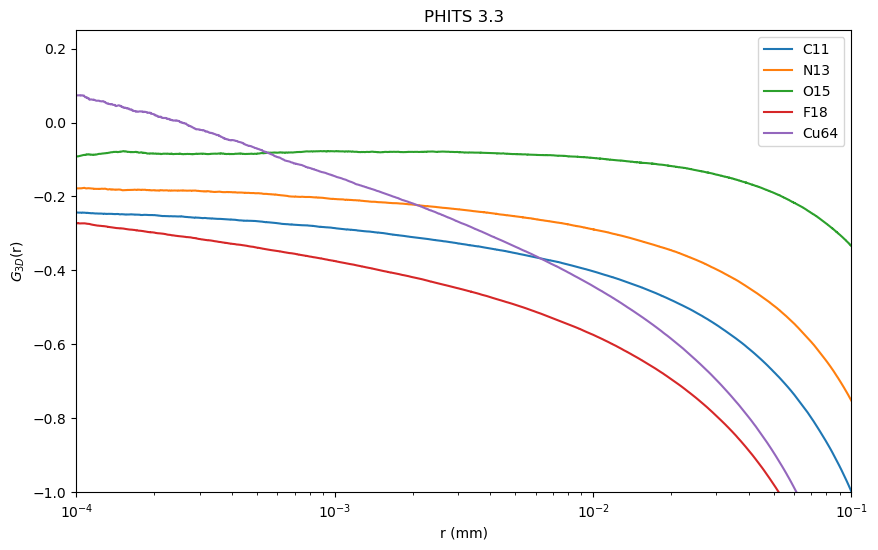

In [24]:
NucData = {  # MeV  Z  A
    "C11":   [0.960, 6, 11],
    "N13":   [1.198, 7, 13],
    "O15":   [1.732, 8, 15],
    "F18":   [0.633, 9, 18],
    "Cu64":  [0.653, 29, 64],
    # "Ga68":  [1.899, 31, 68],
    # "Rb82":  [2.30],
    # "I124":  [1.1]
}

kmax = len(labels_prg)
max_cols = 1
max_rows = int(np.ceil(kmax/max_cols))
mat = "Water"

plt.figure(figsize=(5*(max_cols+1), 6*max_rows))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    plt.xlabel("r (mm)")
    plt.ylabel(r"$G_{3D}$(r)")
    for iso in NucData.keys() if p!="GATE 7.0" else ["C11", "O15", "F18"]:
        if iso not in NucData.keys(): continue 
        l = f"{p} {iso}"
        res = results.active_results[l]
        x = res.rsort
        loga = 0.5
        y = res.G3D_nohist
        y = (np.log(np.log(1/(1-y))) - np.log(x) - loga) / (np.log(x) + loga)
        plt.plot(x, y, label=f"{iso}")
        # analysis.aesthetic_plot()
    plt.xscale('log')
    plt.xlim(histo_step, 1e-1)
    plt.ylim(-1, 0.25)
    plt.legend()


plt.show()

C11   n=7.2e-03    Qc=3.2e+00    1/n=1.4e+02 
N13   n=9.3e-03    Qc=3.6e+00    1/n=1.1e+02 
O15   n=9.7e-03    Qc=4.1e+00    1/n=1.0e+02 
F18   n=3.7e-02    Qc=4.4e+00    1/n=2.7e+01 
Cu64  n=9.7e-01    Qc=1.0e+01    1/n=1.0e+00 
Ga68  n=4.0e-01    Qc=1.0e+01    1/n=2.5e+00 


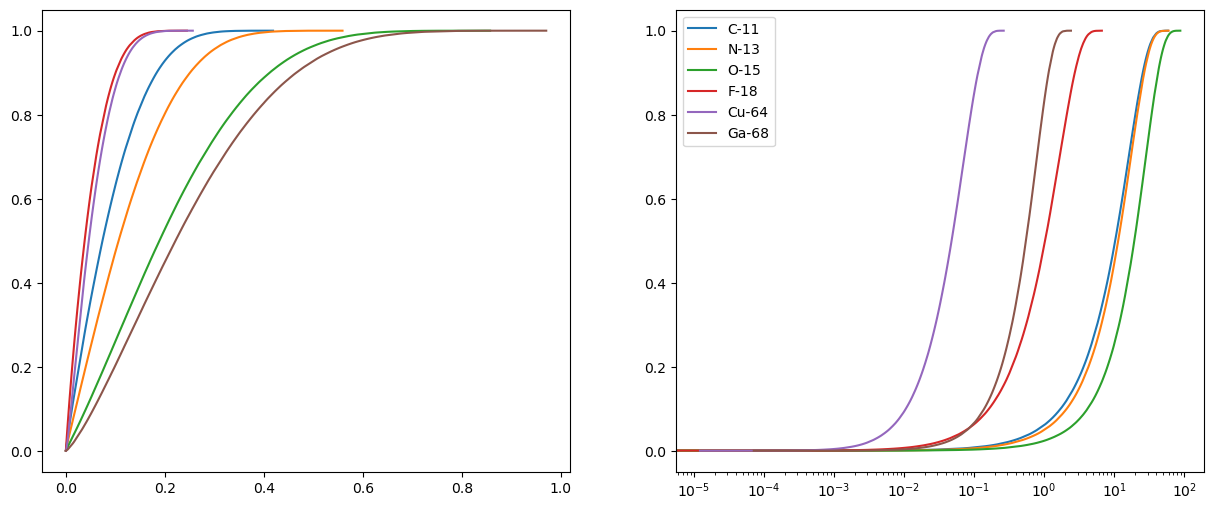

In [62]:
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

NucData = {  # MeV  Z  A
    "C11":   [0.960, 6,  11],
    "N13":   [1.198, 7,  13],
    "O15":   [1.732, 8,  15],
    "F18":   [0.633, 9,  18],
    "Cu64":  [0.653, 29, 64],
    "Ga68":  [1.899, 31, 68],
    # "Rb82":  [2.30],
    # "I124":  [1.1]
}
Qcf = lambda _A, _Z: 0.714 / _A**(1/3) * (_Z*(_Z-1) - (_Z-1)*(_Z-2))
# plt.figure(figsize=(20, 6*max_rows))
plt.figure(figsize=(15, 6))
for k, p in enumerate(pfolders.keys()):
    # plt.subplot(max_rows, max_cols, k+1)
    # plt.title(f"{p}", fontsize=20, fontweight='bold')
    # if k >= kmax-max_cols:
    #     plt.xlabel(r"$r$ (mm)", fontsize=20)
    # if k % max_cols == 0:
    #     plt.ylabel(r"$G_{3D}(r)$", fontsize=20)
    for iso in isotopes if p!="GATE 7.0" else ["C11", "O15", "F18"]:
        if iso not in NucData.keys(): continue
        l = f"{p} {iso}"
        res = results.active_results[l]
        x = res.rsort
        Q, Z, A = NucData[iso]
        Qc, N = Qcf(A, Z), A-Z
        n = Qc/Q * (Qc * 1.26 * (A)**(1/3) / 197.327)**2 / (N/Z)**(1/6)
        print(f"{iso:5} {n=:.1e}    {Qc=:.1e}    {1/n=:.1e} ")
        x = x 
        y = res.G3D_nohist
        # plt.plot(x, np.log(1+np.log(1/(1-y))), label=f"{iso_in_plots(iso)}")
        plt.subplot(1,2,1)
        plt.plot(x, y, label=f"{iso_in_plots(iso)}")
        plt.subplot(1,2,2)
        plt.plot(x/n, y, label=f"{iso_in_plots(iso)}")
        # analysis.aesthetic_plot()
    plt.xscale('log')
    # plt.xlim(1e0, None)
    # plt.ylim(0, 0.2)
    plt.legend()
    break


plt.show()

In [ ]:
Qs = {  # MeV
    "C11": 0.96,
    "N13": 1.19,
    "O15": 1.73,
    "F18": 0.634,
    "Cu64": 0.578,
    "Ga68": 1.907,
    "Rb82": 2.30,
    "I124": 1.1
}
 
kmax = len(labels_prg)
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(16, 8))
p = "GATE 9.2"
for iso in isotopes[::2] if p!="GATE 7.0" else ["C11", "O15", "F18"]:
    l = f"{p} {iso}"
    res = results.active_results[l]
    x = res.rsort
    y = res.G3D_nohist

    plt.subplot(1,2,1)
    plt.plot(x, y, label=f"{iso}")
    # plt.xscale('log')
    # plt.xlim(5e-4, 1e1)

    plt.subplot(1,2,2)
    x = x/(0 + Qs[iso] + 3*Qs[iso]**2 + 0.5* Qs[iso]**3)**(1)
    plt.plot(x, y, label=f"{iso}")
    # plt.xscale('log')
    # plt.xlim(5e-4, 1e1)

plt.show()